In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

In [55]:

df = pd.read_csv('Clean Sales (2017-2018).csv', index_col=0)
df.head()

,Time Zone,Category,Item,Qty,Price Point Name,Modifiers Applied,Gross Sales,Discounts,Net Sales,Tax,Dining Option
Date,,,,,,,,,,,
2017-09-05 16:51:58,Pacific Time (US & Canada),Misc,Custom Amount,1,NaN,NaN,1.00,0.0,1.00,0.00,NaN
2017-09-18 18:02:14,Pacific Time (US & Canada),Coffee,Caramel mac,1,"Small, 12 oz",NaN,4.00,0.0,4.00,0.20,For Here
2017-09-18 18:02:14,Pacific Time (US & Canada),Coffee,Cappuccino,1,"Small, 12 oz",NaN,3.62,0.0,3.62,0.18,For Here
2017-09-18 18:02:14,Pacific Time (US & Canada),Tea,Chai,1,"Small, 12 oz",NaN,3.90,0.0,3.90,0.20,For Here
2017-09-18 18:04:50,Pacific Time (US & Canada),Coffee,Cappuccino,1,"Small, 12 oz",NaN,3.62,0.0,3.62,0.18,For Here


In [56]:
#1.	Determine the biggest sale (for funsies)
df[df['Gross Sales'] == df['Gross Sales'].describe()['max']]
#Someone spent $202.50 at the cafe once in 2018.

,Time Zone,Category,Item,Qty,Price Point Name,Modifiers Applied,Gross Sales,Discounts,Net Sales,Tax,Dining Option
Date,,,,,,,,,,,
2018-02-20 17:18:53,Pacific Time (US & Canada),Breakfast,Breakfast things,30,Breakfast Muffin,NaN,202.5,0.0,202.5,10.12,NaN


In [57]:
#2.	Determine which item sold the most, by sales
item_sales = df['Net Sales'].groupby(df['Item']).sum()
print(item_sales.idxmax(),item_sales.max().round(2))

Breakfast things 94089.54


In [58]:
#3.	Determine which item sold the least, by sales
print(item_sales[item_sales != 0].idxmin(), item_sales[item_sales != 0].min())

Hario V60-01 White (100 Pack) 6.82


In [59]:
#4.	Determine which category sold the most, by sales
category_sales = df['Net Sales'].groupby(df['Category']).sum()
print(category_sales.idxmax(),round(category_sales.max(),2))


Coffee 211111.83


In [60]:
#5.	Determine which category sold the least, by sales
category_sales = df['Net Sales'].groupby(df['Category']).sum()
category_sales = category_sales[category_sales != 0]
print(category_sales[category_sales != 0].idxmin(),category_sales.min())

Delivery Fee 30.0


In [61]:
#6.	Convert the ‘Category’ column into CategoricalDtype 
df['Category']=df['Category'].astype('category')


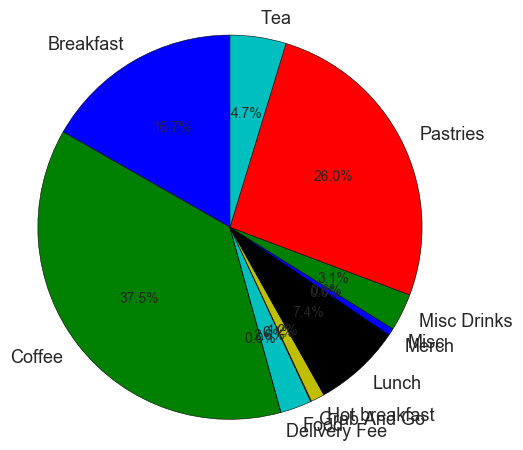

In [62]:
#7.	Generate a pie chart for sales by category
labels = category_sales.index
sizes = category_sales/category_sales.sum()*100
fig,ax = plt.subplots(figsize = (5,5))
ax.pie(sizes,labels=labels, autopct='%1.1f%%', startangle = 90)

ax.axis('equal')
plt.show()


# category_sales.plot(kind='pie', figsize = (10,10),fontsize = 10) 


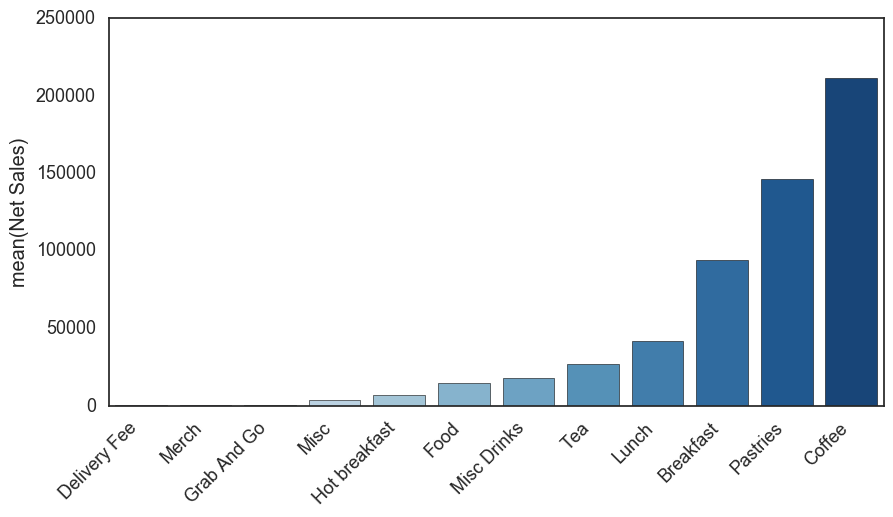

In [63]:
#8.	Generate a pie chart for sales by category - seaborn

sns.set(style="white", context="talk")
# x = df['Net Sales'].groupby(df['Category']).sum().sort_values(ascending=True)[1:].index
# y = df['Net Sales'].groupby(df['Category']).sum().sort_values(ascending=True)[1:].values
#The above doesn't work for some reason
plt.figure(figsize = (10,5))
x = df['Category'].cat.categories
y = df['Net Sales'].groupby(df['Category']).sum()

ax = sns.barplot(x=x, y=y, palette="Blues", order=category_sales.sort_values(ascending=True).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
